<a href="https://colab.research.google.com/github/SaimaBZ/Innomatics_Research_Lab_Hackathon_Project/blob/main/Innomatics_Research_Labs_Hackathon_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
#1. Counting number of ".csv" files available in the dataset
directory = '/content/'

files = os.listdir(directory)

csv_files = [file for file in files if file.endswith('.csv')]
csv_count = len(csv_files)

print(f"Number of CSV files: {csv_count}")


Number of CSV files: 4


In [3]:
#2. Shape of Movies.csv
df_movies = pd.read_csv('/content/movies.csv')
df_movies.shape

(9742, 3)

In [4]:
#3. Shape of Ratings.csv
df_ratings = pd.read_csv('/content/ratings.csv')
df_ratings.shape

(100836, 4)

In [5]:
#4. Number of unique userId are available in Ratings.csv
df_ratings['userId'].nunique()

610

In [6]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df_movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [70]:
#5. Movie which has received maximum number of user ratings

ratings_count = df_ratings.groupby('movieId').size()

most_rated_movie_id = ratings_count.idxmax()
max_ratings = ratings_count.max()

most_rated_movie_title = df_movies.loc[df_movies['movieId'] == most_rated_movie_id, 'title'].values[0]
print(most_rated_movie_title)

Forrest Gump (1994)


In [62]:
df_tags = pd.read_csv('/content/tags.csv')
df_tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [67]:
#6. Selecting all the correct tags submitted by users to "Matrix, The (1999)" movie

matrix_movie_id = df_movies[df_movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = df_tags[df_tags['movieId'] == matrix_movie_id]['tag'].unique()
print(matrix_tags)


['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [68]:
#7. Average user rating for movie named "Terminator 2: Judgment Day (1991)"

terminator_movie_id = df_movies[df_movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator_ratings = df_ratings[df_ratings['movieId'] == terminator_movie_id]['rating']
average_rating = terminator_ratings.mean()
print(f"{average_rating:.2f}")

3.97


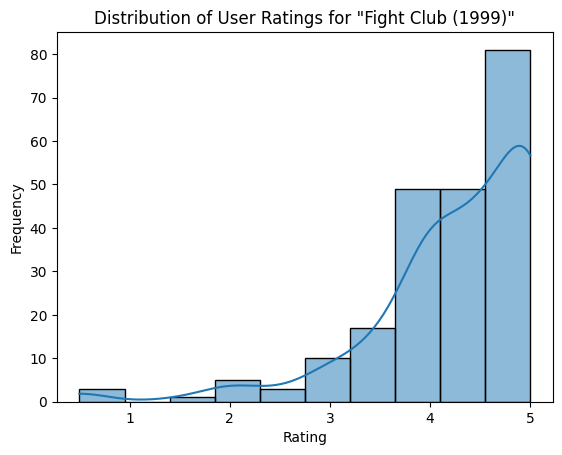

In [71]:
#8. Data distribution of user ratings for "Fight Club (1999)" movie looks like
fight_club_id = df_movies.loc[df_movies['title'] == "Fight Club (1999)", 'movieId'].values[0]


fight_club_ratings = df_ratings.loc[df_ratings['movieId'] == fight_club_id, 'rating']


sns.histplot(fight_club_ratings, kde=True, bins=10)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [16]:
#TASKS

In [75]:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
aggregated_ratings = df_ratings.groupby('movieId').agg(
    count=('rating', 'size'),
    mean=('rating', 'mean')
)


aggregated_ratings = aggregated_ratings.reset_index()

print(aggregated_ratings.head())

   movieId  count      mean
0        1    215  3.920930
1        2    110  3.431818
2        3     52  3.259615
3        4      7  2.357143
4        5     49  3.071429


In [76]:
#2. Applying inner join on dataframe created from movies.csv and the grouped df from above

df_movies_ratings = df_movies.merge(aggregated_ratings, on='movieId', how='inner')
print(df_movies_ratings.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
3                         Comedy|Drama|Romance      7  2.357143  
4                                       Comedy     49  3.071429  


In [77]:
#3 Filter only those movies which have more than 50 user ratings (i.e. > 50)

df_movies_ratings[df_movies_ratings['count'] > 50]

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [87]:
#1. The most popular movie based on  average user ratings

aggregated_ratings = df_ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(df_movies, aggregated_ratings, on='movieId', how='inner')
filtered_movies = merged_df[merged_df['count'] > 50]
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]
print(f"'{most_popular_movie['title']}' with an average rating of {most_popular_movie['mean']:.2f}.")

'Shawshank Redemption, The (1994)' with an average rating of 4.43.


In [91]:
#2.Selecting all the correct options which comes under top 5 popular movies based on number of user ratings.

df_movies_ratings.sort_values(by='count', ascending=False).head(5)



,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [92]:
#3. The Sci-Fi movie is "third most popular" based on the number of user ratings

df_movies_ratings[df_movies_ratings['genres'].str.contains('Sci-Fi')].sort_values(by='count', ascending=False).head(3)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000


In [93]:
#WEB SCRAPING PART


In [94]:
import pandas as pd
import time
import requests
from bs4 import BeautifulSoup
import numpy as np

# Load links.csv
links_df = pd.read_csv('/content/links.csv')

# Merge the links with the filtered df_movies_ratings
filtered_movies = df_movies_ratings[df_movies_ratings['count'] > 50]
filtered_movies = pd.merge(filtered_movies, links_df[['movieId', 'imdbId']], on='movieId')

# Scrape IMDb ratings for each movie
filtered_movies['imdb_rating'] = filtered_movies['imdbId'].apply(lambda x: scrapper(x))

time.sleep(2)

# Display the DataFrame with IMDb ratings
print(filtered_movies[['title', 'imdb_rating']].head())


Scraping URL: https://www.imdb.com/title/tt0114709/
Scraping URL: https://www.imdb.com/title/tt0113497/
Scraping URL: https://www.imdb.com/title/tt0113228/
Scraping URL: https://www.imdb.com/title/tt0113277/
Scraping URL: https://www.imdb.com/title/tt0114319/
Scraping URL: https://www.imdb.com/title/tt0113189/
Scraping URL: https://www.imdb.com/title/tt0112346/
Scraping URL: https://www.imdb.com/title/tt0112641/
Scraping URL: https://www.imdb.com/title/tt0114388/
Scraping URL: https://www.imdb.com/title/tt0112281/
Scraping URL: https://www.imdb.com/title/tt0113161/
Scraping URL: https://www.imdb.com/title/tt0113627/
Scraping URL: https://www.imdb.com/title/tt0114746/
Scraping URL: https://www.imdb.com/title/tt0112431/
Scraping URL: https://www.imdb.com/title/tt0112818/
Scraping URL: https://www.imdb.com/title/tt0112697/
Scraping URL: https://www.imdb.com/title/tt0114369/
Scraping URL: https://www.imdb.com/title/tt0114148/
Scraping URL: https://www.imdb.com/title/tt0114814/
Scraping URL

In [50]:
def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"

    print(f"Scraping URL: {URL}")  # Debugging output

    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }

    response = requests.get(URL, headers=request_header)

    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan

    soup = BeautifulSoup(response.text, 'html.parser')

    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})

    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan

In [95]:
#1. The movieId of the movie which has the highest IMDB rating.

filtered_movies['imdb_rating'] = pd.to_numeric(filtered_movies['imdb_rating'], errors='coerce')

max_imdb_index = filtered_movies['imdb_rating'].idxmax()
max_imdb_movieId = filtered_movies.loc[max_imdb_index, 'movieId']
max_imdb_movie_title = filtered_movies.loc[max_imdb_index, 'title']
max_imdb_rating = filtered_movies.loc[max_imdb_index, 'imdb_rating']

print(f"The movie  '{max_imdb_movie_title}' (movieId: {max_imdb_movieId}) with a rating of {max_imdb_rating}.")


The movie  'Shawshank Redemption, The (1994)' (movieId: 318) with a rating of 9.3.


In [97]:
#2. The movieId of the "Sci-Fi" movie which has the highest IMDB rating.

filtered_movies['imdb_rating'] = pd.to_numeric(filtered_movies['imdb_rating'], errors='coerce')

sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', na=False)]
max_imdb_index_sci_fi = sci_fi_movies['imdb_rating'].idxmax()
max_imdb_movieId_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'movieId']
max_imdb_movie_title_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'title']
max_imdb_rating_sci_fi = sci_fi_movies.loc[max_imdb_index_sci_fi, 'imdb_rating']

print(f"The Sci-Fi  '{max_imdb_movie_title_sci_fi}' (movieId: {max_imdb_movieId_sci_fi}) with a rating of {max_imdb_rating_sci_fi}.")


The Sci-Fi  'Inception (2010)' (movieId: 79132) with a rating of 8.8.
